<a href="https://colab.research.google.com/github/BHARATJHAWAR52/IMDB_Sentiment_Analysis/blob/main/IMDB_Dataset_of_50K_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("/content/drive/MyDrive/IMDB Dataset of 50K Movie Reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Checking if there are any nan value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Checking if there are duplicates

In [5]:
df['review'].duplicated().sum()

418

As there are 418 duplicate values lets drop them

In [6]:
df = df.drop_duplicates(subset=['review'], keep='first')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.shape

(49582, 2)

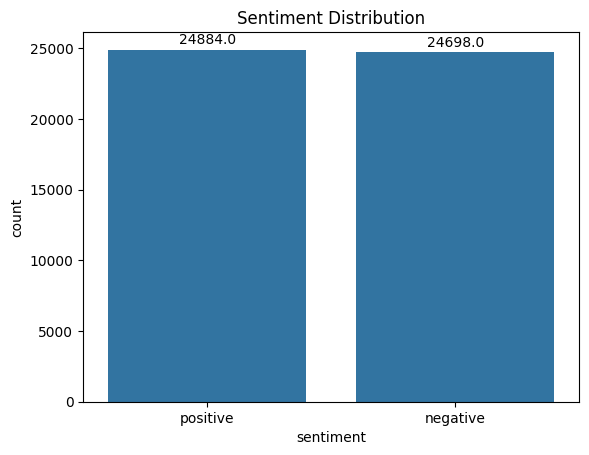

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.countplot(x='sentiment',data=df)
# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7),
                textcoords='offset points')

# Show the plot
plt.title("Sentiment Distribution")
plt.show()

The number of positive and negative sentiment review are very much balanced


In [9]:
# Summary statistics for review length
df['review_length'] = df['review'].apply(len)
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [10]:
df['word_length'] = df['review'].apply(lambda x: len(x.split()))
df.head()

,review,sentiment,review_length,word_length
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


We here check the word length and the character length of each review as they will help us know after we preprocess our data if done correctly or not


In [11]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})
df.head(1)

,review,sentiment,review_length,word_length
0,One of the other reviewers has mentioned that ...,1,1761,307


Converting the sentiment into numeric value 1 for positive and 0 for negative

In [12]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
import re
def clean_review(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text) # Remove special characters and numbers
    text = re.sub('<br />', '',text) #removing break tags
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    #removing stopwords
    tokens=word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return " ".join(tokens)


All the letters are converted to lower case and most of the unneccesary words,i.e. stopwords, special character, links, html tags, extra spaces are removed for better model training

In [14]:
df['review'] = df['review'].apply(clean_review)

In [15]:
df.head()

,review,sentiment,review_length,word_length
0,one reviewers mentioned watching oz episode yo...,1,1761,307
1,wonderful little production filming technique ...,1,998,162
2,thought wonderful way spend time hot summer we...,1,926,166
3,basically theres family little boy jake thinks...,0,748,138
4,petter matteis love time money visually stunni...,1,1317,230


In [16]:
df['review_length'] = df['review'].apply(len)
df['word_length'] = df['review'].apply(lambda x: len(x.split()))
df.head()

,review,sentiment,review_length,word_length
0,one reviewers mentioned watching oz episode yo...,1,1157,167
1,wonderful little production filming technique ...,1,656,84
2,thought wonderful way spend time hot summer we...,1,587,85
3,basically theres family little boy jake thinks...,0,456,66
4,petter matteis love time money visually stunni...,1,863,125


As we can see the character length and the word length both has reduced to considerable number meaning that the preprocessing worked well


In [17]:
cleaned_df=df # keeping a cleaned dataframe for just in case

In [18]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(stemmer.stem(i))
    return " ".join(y)

In [19]:
df.review = df['review'].apply(lambda x: stem(x))

Stemming the data as we do not need any repetative of any word

In [20]:
df['review_length'] = df['review'].apply(len)
df['word_length'] = df['review'].apply(lambda x: len(x.split()))
df.head()

,review,sentiment,review_length,word_length
0,one review mention watch oz episod youll hook ...,1,1047,167
1,wonder littl product film techniqu unassum old...,1,566,84
2,thought wonder way spend time hot summer weeke...,1,531,85
3,basic there famili littl boy jake think there ...,0,408,66
4,petter mattei love time money visual stun film...,1,768,125


We have preprocessed the data now we run check for most used words in positive and negative reviews respectively as it may give us some idea how to proceed further ahead

In [21]:
positive_review= df[df.sentiment==1]
positive_review.head()

,review,sentiment,review_length,word_length
0,one review mention watch oz episod youll hook ...,1,1047,167
1,wonder littl product film techniqu unassum old...,1,566,84
2,thought wonder way spend time hot summer weeke...,1,531,85
4,petter mattei love time money visual stun film...,1,768,125
5,probabl alltim favorit movi stori selfless sac...,1,338,56


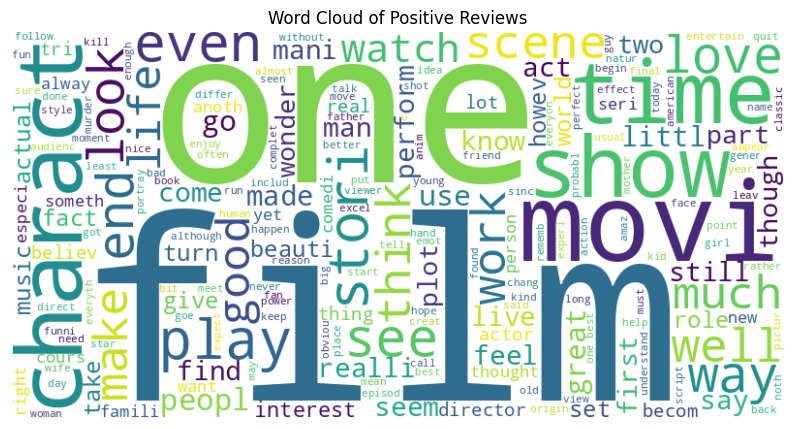

In [22]:
from wordcloud import WordCloud

all_positive_reviews = ' '.join(positive_review['review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

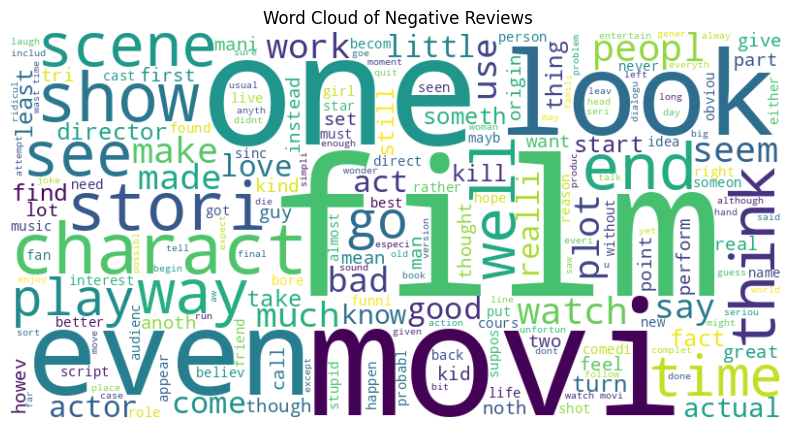

In [23]:
negative_review= df[df.sentiment==0]

all_negative_reviews = ' '.join(negative_review['review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

In [24]:
from collections import Counter
count = Counter()
for text in positive_review['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common(20)

[('film', 48864),
 ('movi', 42932),
 ('one', 26848),
 ('like', 19815),
 ('time', 15420),
 ('see', 14631),
 ('good', 14517),
 ('stori', 13616),
 ('charact', 13570),
 ('make', 13116),
 ('great', 12725),
 ('get', 12528),
 ('watch', 12440),
 ('love', 12019),
 ('well', 11269),
 ('show', 10756),
 ('realli', 10643),
 ('also', 10521),
 ('would', 10320),
 ('play', 9805)]

In [25]:
pos_words=pd.DataFrame(count.most_common(20))
pos_words.columns = ['words','count']
pos_words.head()

,words,count
0,film,48864
1,movi,42932
2,one,26848
3,like,19815
4,time,15420


In [26]:
for text in negative_review['review'].values:
  for word in text.split():
    count[word]+=1
count.most_common(20)

[('movi', 98280),
 ('film', 91492),
 ('one', 52283),
 ('like', 43469),
 ('time', 29593),
 ('good', 28718),
 ('make', 28380),
 ('get', 27502),
 ('charact', 27347),
 ('see', 27341),
 ('watch', 26829),
 ('even', 24546),
 ('stori', 24080),
 ('would', 23803),
 ('realli', 22732),
 ('scene', 20562),
 ('show', 19167),
 ('look', 19058),
 ('well', 18816),
 ('much', 18733)]

In [27]:
neg_words=pd.DataFrame(count.most_common(20))
neg_words.columns = ['words','count']
neg_words.head()

,words,count
0,movi,98280
1,film,91492
2,one,52283
3,like,43469
4,time,29593


In [29]:
import plotly.express as px

In [30]:
px.bar(pos_words,x='count',y='words',title='Common Words in Positive Reviews',color='words')

In [31]:
px.bar(neg_words,x='count',y='words',title='Common Words in Negative Reviews',color='words')

Our data analysis is done and now lets move towards model Building.

In [32]:
X=df['review']
Y=df['sentiment']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X=vect.fit_transform(df['review'])

Splitting the data into train and test data and then vectorizing it for better understanding for the model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=27)

Now using the 3 most common model to get the accuracy and classification report.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)
Y_pred_lr = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(Y_pred_lr,Y_test))
print(classification_report(Y_test, Y_pred_lr))

Logistic Regression Accuracy: 0.8898860542502773
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4955
           1       0.88      0.90      0.89      4962

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(Y_pred_svm,Y_test))
print(classification_report(Y_test, Y_pred_svm))

SVM Accuracy: 0.8940203690632248
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4955
           1       0.89      0.90      0.89      4962

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=27)

rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_pred_rf,Y_test))
print(classification_report(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.8442069174145407
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4955
           1       0.84      0.85      0.85      4962

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



Test accuracy of Logistic Regression: 88.98 %

Test accuracy of SVM linear: 89.40%

Test accuracy of Random Forest: 84.42%

Best accuracy is given by SVM linear with accuracy of 89.40%

